In [1]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform
from Bio.PDB import PDBParser
import numpy as np
from Bio.Data.IUPACData import protein_letters_1to3
from matplotlib.lines import Line2D
from Bio.Data.IUPACData import protein_letters_3to1
from Bio import PDB


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Bio.PDB import PDBParser
from Bio.Data.IUPACData import protein_letters_1to3
from itertools import combinations
from Bio.PDB import PDBParser, PPBuilder
from Bio.PDB.Polypeptide import Polypeptide
import re

In [3]:
from Bio.SeqUtils import seq1

In [4]:
def extract_coords_from_pdb(pdb_file, chains, sequences):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_file)

    coords = {}
    for model in structure:
      for chain_id, sequence in zip(chains, sequences):
          chain = model[chain_id]
          residues = [res for res in chain]

          pdb_sequence = "".join(seq1(res.get_resname()) for res in residues if res.get_resname() in PDB.Polypeptide.standard_aa_names)

          start_idx = pdb_sequence.find(sequence)

          for i, res in enumerate(residues[start_idx:start_idx + len(sequence)]):
            res_name = seq1(res.get_resname())
            atom = res['CA'] if 'CA' in res else res['N']
            coords[(chain_id, res_name, res.id[1])] = (atom.coord.tolist())

    return coords

In [6]:
def calculate_3d_distance(coord1, coord2):
    return np.linalg.norm(np.array(coord1) - np.array(coord2))

In [27]:
def plot_combined_residue_graph(coords, labels=None, max_distance=5.0):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    colors = ['blue', 'green', 'red', 'purple', 'orange']

    chains = set(key[0] for key in coords)

    if labels is None:
        labels = chains

    chain_to_color = {chain: colors[i % len(colors)] for i, chain in enumerate(chains)}

    for chain_id in chains:
        chain_residues = [(res_key, coords[res_key]) for res_key in coords if res_key[0] == chain_id]
        chain_residues.sort(key=lambda x: x[0][2])

        residues = [res[0] for res in chain_residues]
        x = [res[1][0] for res in chain_residues]
        y = [res[1][1] for res in chain_residues]
        z = [res[1][2] for res in chain_residues]


        node_size = 120
        font_size = 11
        res_num_font_size = 8

        for res_key, coord in chain_residues:
            ax.plot([coord[0]], [coord[1]], [coord[2]],
                    marker='s',
                    markersize=node_size/10,
                    markerfacecolor=chain_to_color[chain_id],
                    markeredgecolor=chain_to_color[chain_id],
                    markeredgewidth=1.2,
                    alpha=0.9,
                    linestyle='none',
                    zorder=3)

        for i in range(len(chain_residues)-1):
            ax.plot([x[i], x[i+1]], [y[i], y[i+1]], [z[i], z[i+1]],
                    c=chain_to_color[chain_id], alpha=0.3, linestyle='-')

    keys = list(coords.keys())

    for i in range(len(keys)):
        for j in range(i+1, len(keys)):
            if keys[i][0] != keys[j][0]:
                dist = calculate_3d_distance(coords[keys[i]], coords[keys[j]])
                if dist < max_distance:
                    c1 = coords[keys[i]]
                    c2 = coords[keys[j]]
                    ax.plot([c1[0], c2[0]], [c1[1], c2[1]], [c1[2], c2[2]],
                            c='gray', alpha=0.3, linestyle='--', linewidth=0.8)


    for res_key, coord in coords.items():
        chain, res_name, res_num = res_key
        ax.text(coord[0], coord[1], coord[2],
                res_name,
                color='white',
                fontsize=font_size,
                ha='center', va='center',
                fontweight='bold',
                zorder=10)

        ax.text(coord[0] + 1.3, coord[1] + 1.3, coord[2] + 0.5,
                str(res_num),
                color='gray',
                fontsize=res_num_font_size,
                ha='center', va='center',
                zorder=4)

    ax.set_axis_off()
    ax.set_xlabel('X (Å)')
    ax.set_ylabel('Y (Å)')
    ax.set_zlabel('Z (Å)')
    # plt.legend(labels)
    ax.view_init(elev=90, azim=90)

    plt.tight_layout()
    plt.show()


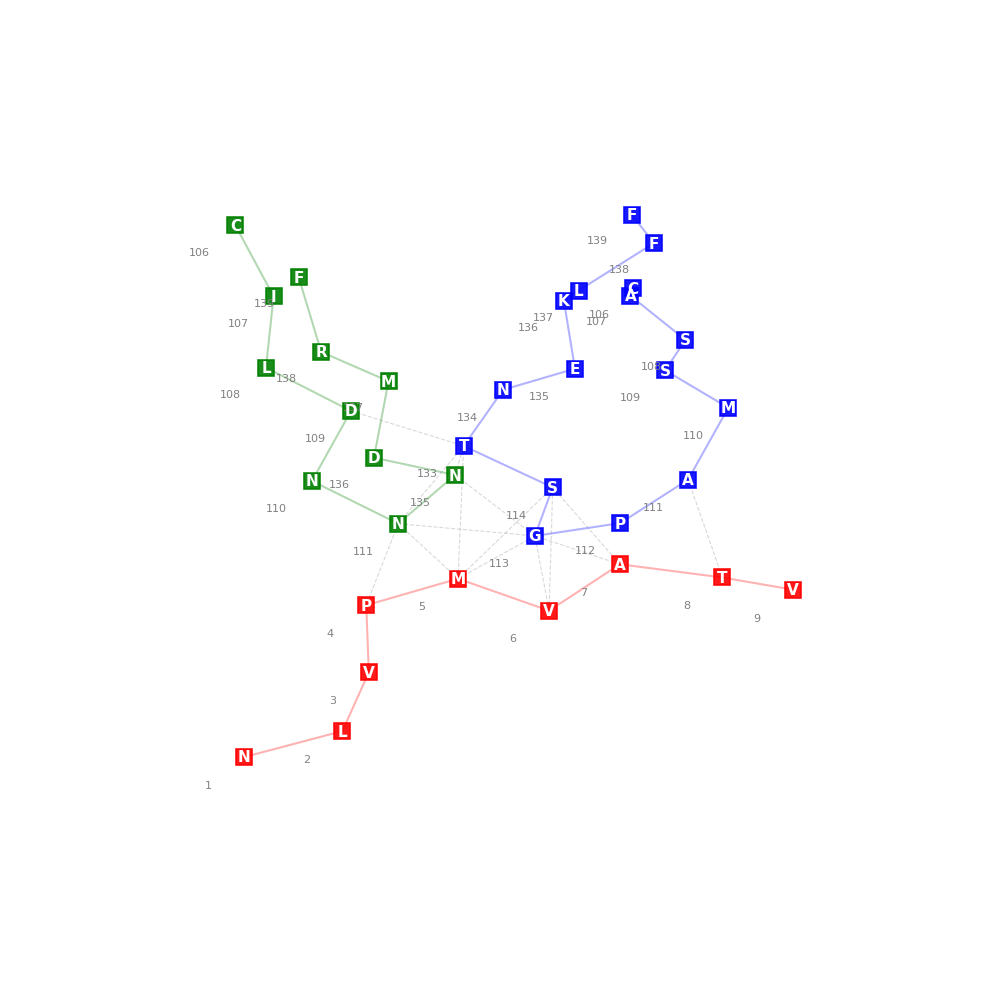

In [28]:
pdb_file = '/content/ranked_0 (1).pdb'
coords = extract_coords_from_pdb(pdb_file, chains=['D', 'C', 'E'],  sequences=['CILDNNNDMRF','NLVPMVATV', 'CASSMAPGSTNEKLFF'])
plot_combined_residue_graph(coords, labels=['Chain D: CASSMAPGSTNEKLFF', 'Chain C: NLVPMVATV', 'Chain E: CILDNNNDMRF'], max_distance=7.0)

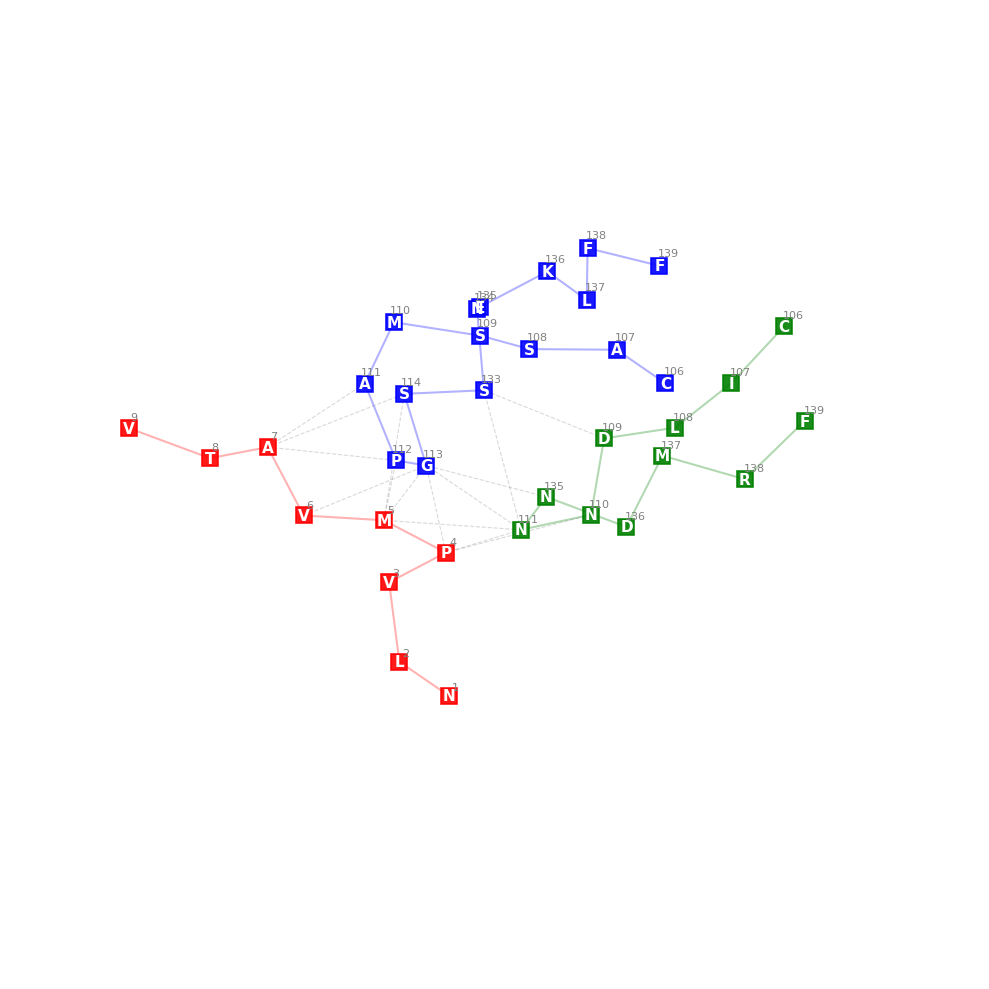

In [26]:
pdb_file = '/content/ranked_0 (2).pdb'
coords = extract_coords_from_pdb(pdb_file, chains=['D', 'C', 'E'],  sequences=['CILDNNNDMRF','NLVPMVATV', 'CASSMAPGSSNEKLFF'])
plot_combined_residue_graph(coords, labels=['Chain D: CASSMAPGSSNEKLFF', 'Chain C: NLVPMVATV', 'Chain E: CILDNNNDMRF'], max_distance=7.0)